In [74]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install cfgrib


Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [82]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math
from collections import Counter
from cmcrameri import cm

### **<font color="Purple"> Datos de ERA5 </font>**

##### **<font color="olive"> Geopotencial </font>**

In [83]:
# esta es la base completa de gph 

In [84]:
gph_file = 'datasets/gph_daily_500_1979-2019.nc'

In [85]:
gph_ds19=xr.open_dataset(gph_file)
gphds19 = gph_ds19['z']

In [86]:
gphds19500 = gphds19.sel(level=500)

In [87]:
gphds19lats = gphds19500.sel(latitude=slice(40, 5), longitude=slice(-133,-63.5))

In [88]:
gph_climday = gphds19lats.groupby('time.dayofyear').mean('time')

In [89]:
gphclimdaysuav = gph_climday.rolling(dayofyear=7, center=True, min_periods=1).mean()

In [90]:
anomaliasgph = gphds19lats.groupby('time.dayofyear') - gphclimdaysuav 

##### **<font color="olive"> Viento </font>**

In [91]:
u_file = 'datasets/u_200_500_daily1979-2019.nc'

In [92]:
u_ds = xr.open_dataset(u_file)

In [93]:
u_ds["time"] = u_ds.time.dt.floor("D") #para quitarle los nanosegundos y solo tener YYYY-MM-DD

In [94]:
u_ds200 = u_ds.sel(level=200)

In [95]:
u_ds200.time.dt.season

<xarray.DataArray 'season' (time: 14761)> Size: 177kB
array(['DJF', 'DJF', 'DJF', ..., 'MAM', 'MAM', 'MAM'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 118kB 1979-01-01 1979-01-02 ... 2019-05-31
    level    float64 8B 200.0
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds
    axis:           T

##### **<font color="olive"> Concat de índice >1 y valores de gph </font>**

In [96]:
# esta es la base que tiene solo las fechas cuando el índice > 1
# es también las anomalías del ciclo anual 

In [97]:
idxp_gph_file = 'datasets/gph_idx_p.nc'

In [98]:
idxp_gph_ds = xr.open_dataset(idxp_gph_file)

In [99]:
idxp_gph = idxp_gph_ds['z']

In [100]:
idxp_gph_vals = idxp_gph.mean(dim='time') #ya se puede mapear

In [101]:
idxp_gph_season =idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time') #DJF
idxp_gph_djf = idxp_gph_season[0] #ya puedo mapear

##### **<font color="olive"> Concat de índice <-1 y valores de gph </font>**

In [102]:
idxn_gph_file = 'datasets/gph_idx_n.nc'

In [103]:
idxn_gph_ds = xr.open_dataset(idxn_gph_file)

In [104]:
idxn_gph = idxn_gph_ds['z']

In [105]:
idxn_gph_vals = idxn_gph.mean(dim='time') #ya se puede mapear

In [106]:
idxn_gph_season =idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time') #DJF
idxn_gph_djf = idxn_gph_season[0] #ya puedo mapear

In [107]:
g=9.807

In [108]:
idxp_gph

<xarray.DataArray 'z' (time: 1952, latitude: 71, longitude: 140)> Size: 155MB
array([[[ 878.98429 ,  903.915387, ..., 2237.746263, 2189.019936],
        [ 889.847468,  912.429811, ..., 2077.97751 , 2027.574278],
        ...,
        [ -65.752823,  -66.686232, ..., -158.977641, -163.534767],
        [ -60.857996,  -62.126326, ..., -154.591852, -159.445068]],

       [[1460.748074, 1506.116118, ..., 2814.129441, 2791.189641],
        [1473.903504, 1516.499474, ..., 2682.042629, 2656.602704],
        ...,
        [ -18.749395,  -19.125353, ..., -108.5945  , -108.95511 ],
        [ -17.715699,  -18.174077, ..., -108.195606, -108.600206]],

       ...,

       [[ 532.430538,  604.223322, ..., 1218.960229, 1205.943472],
        [ 506.031789,  575.260321, ..., 1180.202989, 1166.777421],
        ...,
        [ 103.157544,   97.614037, ...,   68.326516,   67.207193],
        [  93.585613,   89.104315, ...,   66.941638,   65.332954]],

       [[-235.824041, -196.52129 , ..., 1962.709045, 1982.756388],
        [-236.632892, -198.081234, ..., 1932.196527, 1947.62426 ],
        ...,
        [ 141.357299,  140.162046, ...,   67.870813,   66.742529],
        [ 134.270327,  132.326396, ...,   69.206935,   67.633351]]])
Coordinates:
  * time       (time) datetime64[ns] 16kB 1979-03-04 1979-03-05 ... 2019-12-10
  * longitude  (longitude) float32 560B -133.0 -132.5 -132.0 ... -64.0 -63.5
  * latitude   (latitude) float32 284B 40.0 39.5 39.0 38.5 ... 6.5 6.0 5.5 5.0
    level      (time) float64 16kB ...
    dayofyear  (time) int64 16kB ...

In [109]:
idxp_gph_vals = idxp_gph_vals/g
idxp_gph_djf = idxp_gph_djf/g
idxn_gph_vals = idxn_gph_vals/g
idxn_gph_djf = idxn_gph_djf/g

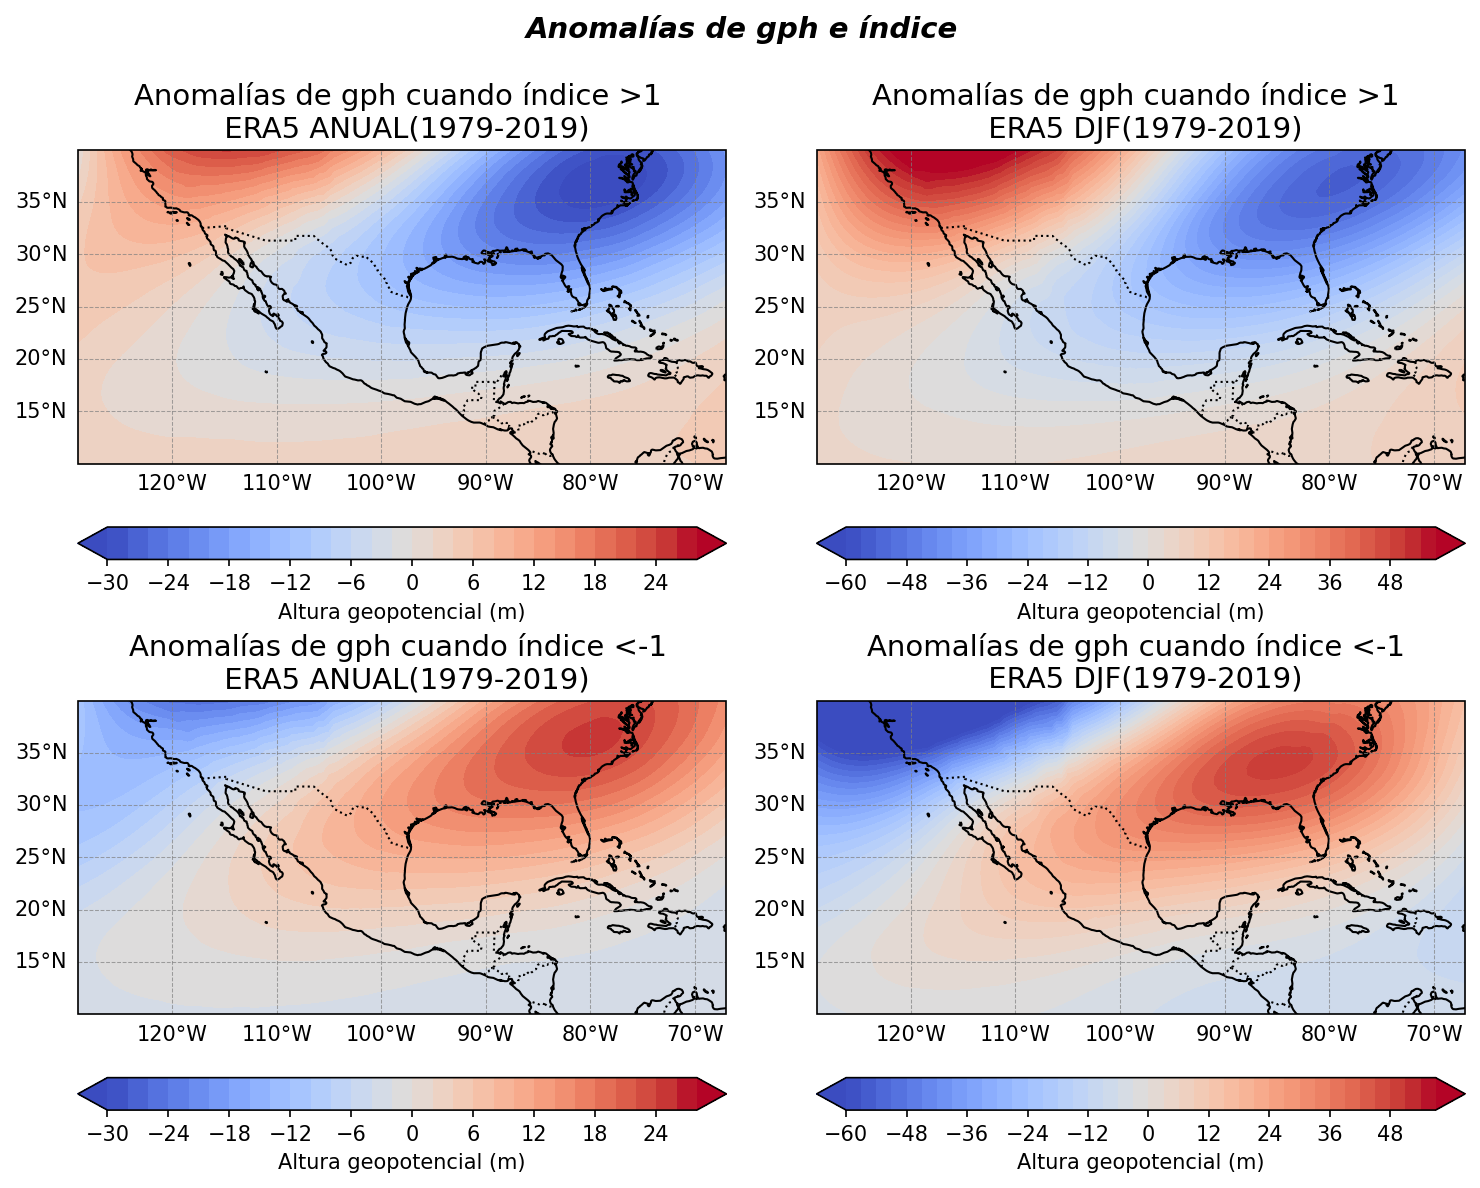

In [144]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL ÍNDICE POSITIVO
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE POSITIVO 
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 DJF(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO 
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE NEGATIVO
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 DJF(1979-2019)',fontsize=14)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
plt.suptitle('Anomalías de gph e índice',fontsize=14,color="k",fontstyle='italic',fontweight='bold');

##### **<font color="olive"> Viento e índice >1 (con valores de gph) </font>**

In [111]:
# u_ds200 y idx_gph son dataArrays, necesito que u_ds se quede solo con la dimensión time de idx_gph

In [112]:
missing_times = np.setdiff1d(idxn_gph.time.values, u_ds200.time.values)
# print(missing_times)
# len(missing_times)

In [113]:
# u_ds_idx = u_ds200.sel(time=idx_gph.time, drop=True)

In [120]:
u_ds_idxp = u_ds200.reindex(time=idxp_gph.time) #del campo de viento solo agarró las fechas cuando índice es positivo

In [116]:
# u_djf_idxp = u_ds200.reindex(time=idxp_gph.time)

In [145]:
u_ds_idxn = u_ds200.reindex(time=idxn_gph.time)

In [118]:
# u_djf_idxn = u_ds200.reindex(time=idxn_gph.time)

In [147]:
u_idxp = u_ds_idxp['u']

In [149]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
u_idxp_vals = u_idxp.mean(dim='time') #ANUAL
u_idxp_season = u_idxp.groupby(u_ds_idxp['u'].time.dt.season).mean(dim='time') #DJF
u_idxp_DJF = u_idxp_season[0] #ya se puede mapear

In [150]:
u_idxn = u_ds_idxn['u']

In [151]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice negativo
u_idxn_vals = u_idxn.mean(dim='time') #ANUAL
u_idxn_season = u_idxn.groupby(u_ds_idxn['u'].time.dt.season).mean(dim='time') #DJF
u_idxn_DJF = u_idxn_season[0] #ya se puede mapear

Text(0.5, 1.0, 'Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)')

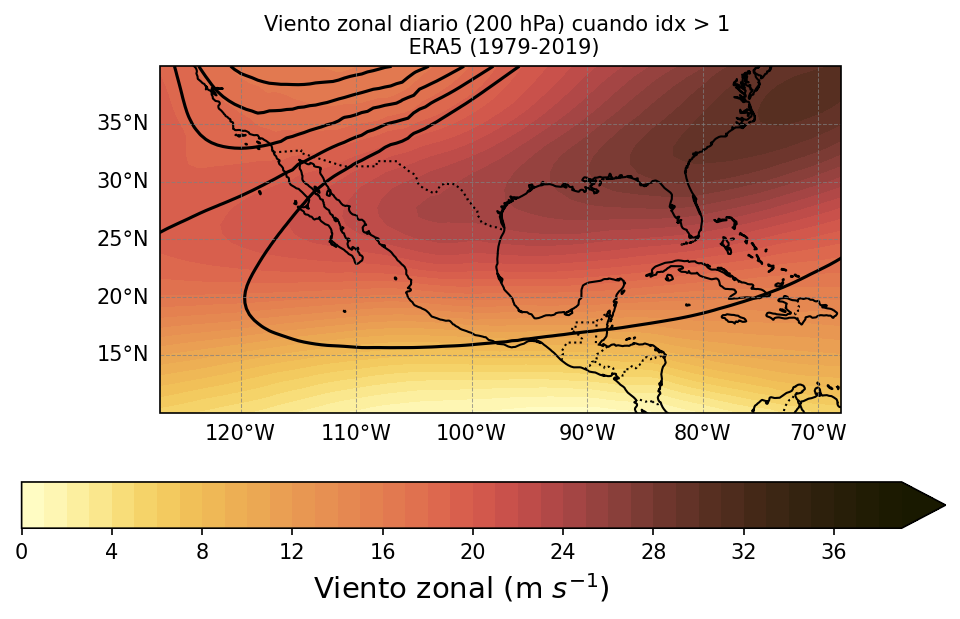

In [139]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
cs = ax1.contourf(u_idx_vals.longitude, u_idx_vals.latitude, u_idx_vals , levels=np.arange(0, 40,1), cmap=cm.lajolla_r, extend='max', transform=ccrs.PlateCarree())
cc = ax1.contour(idxp_gph_vals.longitude, idxp_gph_vals.latitude, idxp_gph_vals,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=14)
plt.title('Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)', fontsize=10)

In [ ]:
plt.figure(figsize=(14, 4), dpi=150)
plt.subplots_adjust(wspace=0.35)

ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.coastlines(linewidth=0.7,alpha=0.6)

cs = ax1.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-300,320,20),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
cc = ax1.contour(u_idx_vals.longitude, u_idx_vals.latitude, u_idx_vals,levels=np.arange(0,40,5),colors='k',transform=ccrs.PlateCarree(),linewidths=0.7,alpha=0.8)
ax1.clabel(cc, cc.levels, inline=True, fontsize=10)
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9,alpha=0.7)
ax1.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Geopotencial (m)', fontsize=14)
plt.title('Viento zonal diario (200 hPa) cuando idx > 1 \n ERA5 (1979-2019)', fontsize=10)

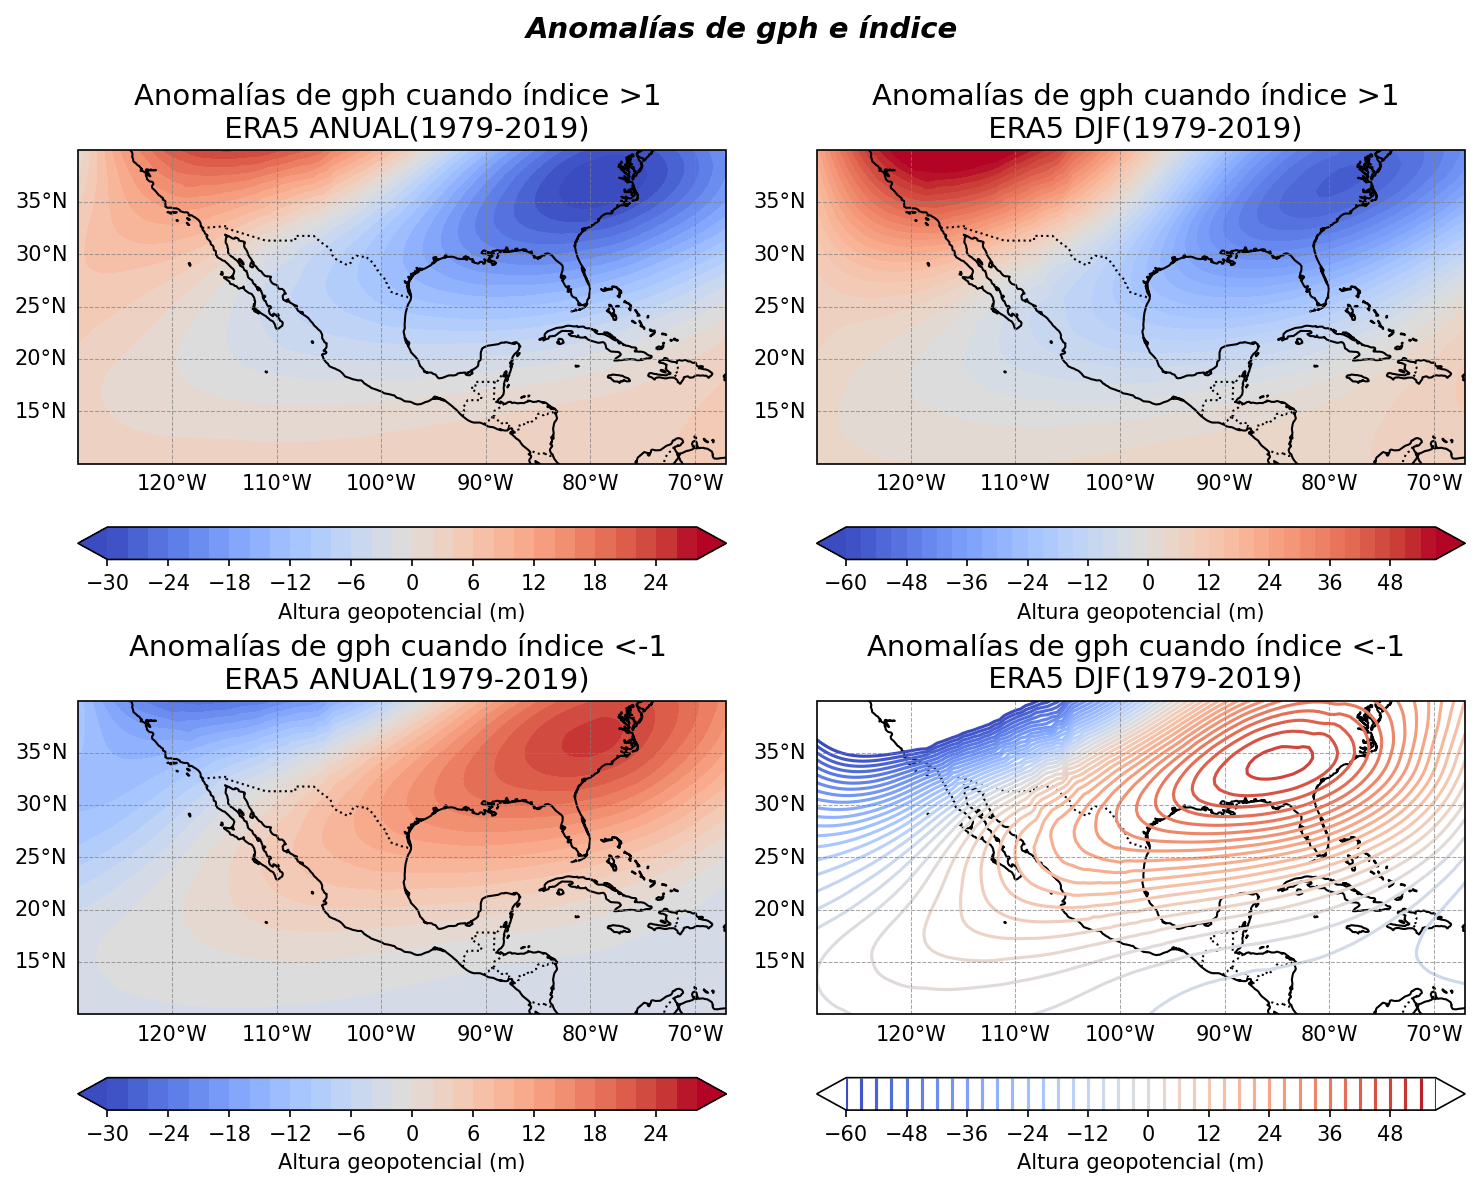

In [178]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL ÍNDICE POSITIVO
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE POSITIVO 
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n ERA5 DJF(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO 
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals,levels=np.arange(-30,30,2),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE NEGATIVO
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-1 \n ERA5 DJF(1979-2019)',fontsize=14)

plt.tight_layout(h_pad=4)
plt.subplots_adjust(top=.87)
plt.suptitle('Anomalías de gph e índice',fontsize=14,color="k",fontstyle='italic',fontweight='bold');

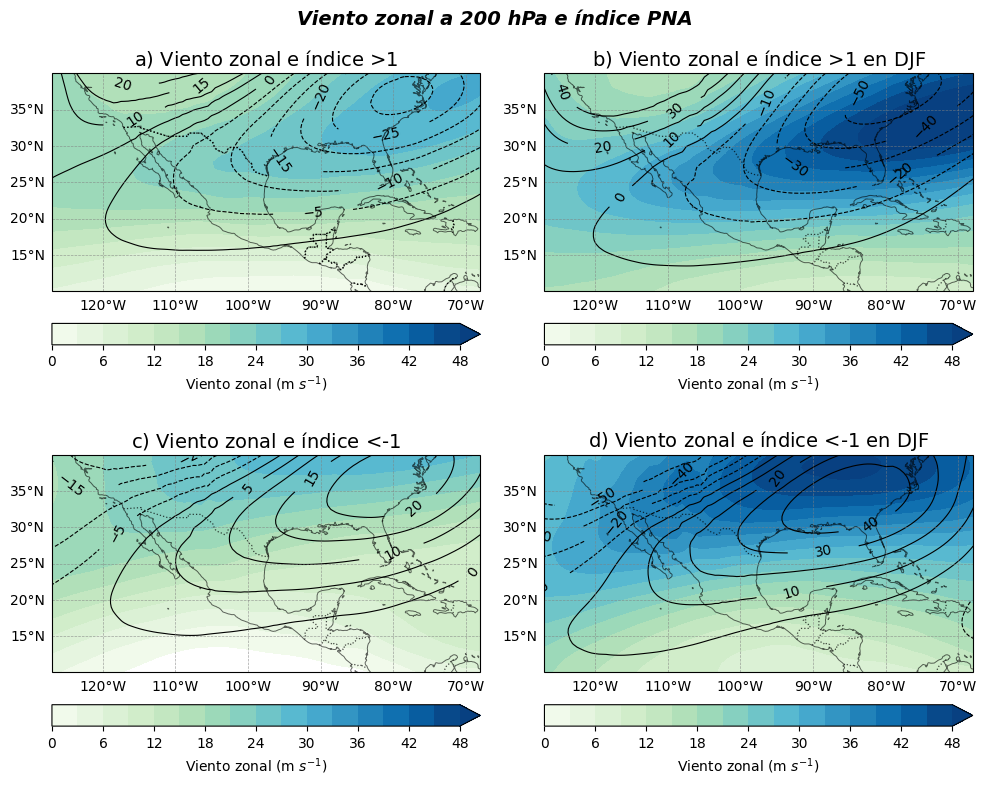

In [177]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()

# Subplot 1: ANUAL INDICE >1
ax = axs[0]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxp_vals.longitude,u_idxp_vals.latitude,u_idxp_vals,levels=np.arange(0,50,3),cmap='GnBu',extend='max',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.longitude,idxp_gph_vals.latitude,idxp_gph_vals, levels=np.arange(-30, 30, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('a$)$ Viento zonal e índice >1', fontsize=14)

# Subplot 2: ANUAL ÍNDICE <-1
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxn_vals.longitude,u_idxn_vals.latitude,u_idxn_vals,levels=np.arange(0,50,3),cmap='GnBu',extend='max',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.longitude,idxn_gph_vals.latitude,idxn_gph_vals, levels=np.arange(-30, 30, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('c$)$ Viento zonal e índice <-1', fontsize=14)

# Subplot 3: Viento zonal promedio durante eventos CAO - ERA-5
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxp_DJF.longitude,u_idxp_DJF.latitude,u_idxp_DJF,levels=np.arange(0,50,3),cmap='GnBu',extend='max',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.longitude,idxp_gph_djf.latitude,idxp_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento zonal e índice >1 en DJF', fontsize=14)

# Subplot 4: Anomalía de viento zonal en DJF - ERA-5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxn_DJF.longitude,u_idxn_DJF.latitude,u_idxn_DJF,levels=np.arange(0,50,3),cmap='GnBu',extend='max',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.longitude,idxn_gph_djf.latitude,idxn_gph_djf, levels=np.arange(-50, 50, 10), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('d$)$ Viento zonal e índice <-1 en DJF', fontsize=14)

# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=.95)
plt.suptitle('Viento zonal a 200 hPa e índice PNA', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

plt.savefig('vientoyPNA')